In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df_subset.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

2785

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [8]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [9]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 1247296 words in this dataset


### Get child ages

In [10]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [11]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]

In [12]:
transcript_df["age_years"] = transcript_df["age_months"] / 12

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


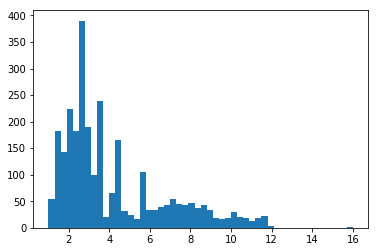

In [13]:
plt.hist(transcript_df.age_years.values, bins = 50);

In [14]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 6)

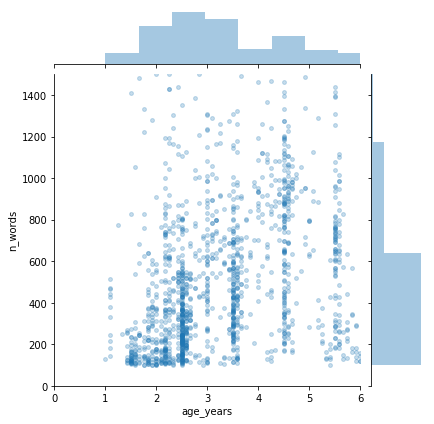

In [15]:
import seaborn as sns

grd = sns.jointplot(
    "age_years",
    "n_words",
    data=transcript_df[transcript_df.n_words > 100],
    alpha=0.25,
    s=15,
)
ax = grd.ax_joint
ax.set_ylim([0, 1500])
ax.set_xlim([0, 6])

In [16]:
np.mean(transcript_df.n_words)

447.862118491921

In [17]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [18]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Run MI by age cohort

In [19]:
distances = np.arange(1,101)

In [20]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  58 out of 100 | elapsed:   10.7s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   13.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  58 out of 100 | elapsed:   11.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  79 out of 100 | elapsed:   14.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.9s finished


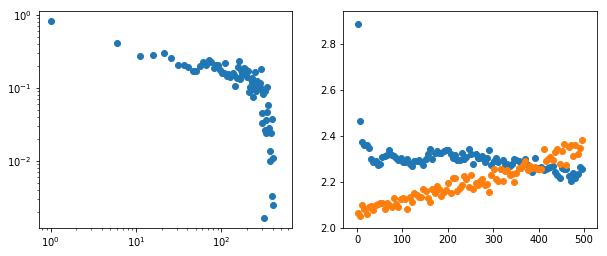

In [59]:
mi_estimation = "adjusted_mi_sklearn"
nex = 5

mi_df = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_words",
        "n_unique_words",
        "top_10_words",
        "transcript_xml",
        "age_years",
        "corpus"
    ]
)
# for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 > age_cohort_low) & (transcript_df.age_months/12 <= age_cohort_high)
    ]
    
    for idx, row in tqdm(cohort_subset.sort_values(by='n_words', ascending=False)[:nex].iterrows(), total=nex):
        transcript_words = [i for i in list(flatten(row.words)) if i not in [None, 'xxx']]
        
        transcript_permute_order = [i for i in list(flatten(np.random.permutation(row.words))) 
                                    if i not in [None, 'xxx']]
        
        transcript_pos = [i for i in np.concatenate(row.POS) if i != '']
        n_words = row.n_words
        n_unique_words = len(np.unique(transcript_words))

        n_unique_words = 0 
        top_10_words = 0
        
        #distances = np.arange(1, int(n_words-1), 1)
        distances = np.arange(1, int(500), 5)
        
        (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
            [transcript_words], distances=distances, n_jobs=-1, mi_estimation=mi_estimation
        )
        
        #(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        #    [transcript_permute_order], distances=distances, n_jobs=-1, estimate=False
        #)
        
        fig,axs = plt.subplots(ncols=2, figsize = (10,4))
        ax = axs[0]
        ax.scatter(distances, MI-shuff_MI)
        ax.plot(distances, MI-shuff_MI, alpha = 0)
        ax.set_yscale('log')
        ax.set_xscale('log')
        
        ax = axs[1]
        ax.scatter(distances, MI)
        ax.scatter(distances, shuff_MI)
        plt.show()
        
        
    
        mi_df.loc[len(mi_df)] = [
            MI,
            MI_var,
            shuff_MI,
            shuff_MI_var,
            distances,
            age_cohort_low,
            age_cohort_high,
            n_words,
            n_unique_words,
            top_10_words, 
            row.transcript_xml,
            row.age_years,
            row.corpus
        ]
        break
    break


In [60]:
mi_df

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words,top_10_words,transcript_xml,age_years,corpus
0,"[2.8874708327438956, 2.462905912456943, 2.3720...","[2.0723450591692703, 2.0732743040145, 2.077290...","[2.064464952330697, 2.0519395261024305, 2.0990...","[2.071961142316766, 2.0741182888163756, 2.0802...","[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56,...",1,1.5,1409,0,0,[/mnt/cube/tsainbur/Projects/github_repos/chil...,1.5,Brown


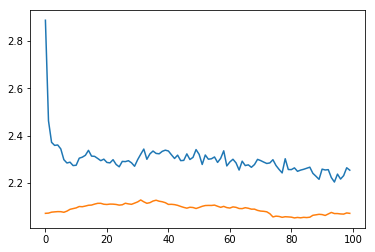

In [64]:
plt.plot(MI)
plt.plot(MI_var)

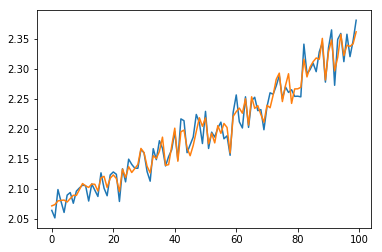

In [63]:
plt.plot(shuff_MI)
plt.plot(shuff_MI_var)

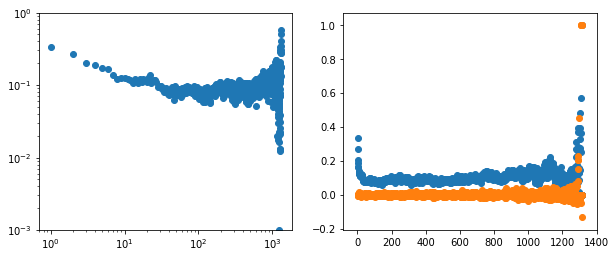

In [49]:
fig,axs = plt.subplots(ncols=2, figsize = (10,4))
ax = axs[0]
ax.scatter(distances, MI-shuff_MI)
ax.plot(distances, MI-shuff_MI, alpha = 0)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e-3, 1])
ax = axs[1]
ax.scatter(distances, MI)
ax.scatter(distances, shuff_MI)
plt.show()

In [41]:
np.unique(transcript_words)

array(['', 'Becky', 'Clip_clop', 'Cromer', 'Daddy', 'Dumpty',
       'Dumpty_Dumpty', 'Eve', 'Fraser', 'Granma', 'Humpty_Dumpty', 'I',
       'Jack', 'Kathy', 'Lynn', 'Mommy', 'Neil', 'Papa', 'Racketyboom',
       'Rangy', 'Sambo', 'Sandy', 'a', 'an', 'are', 'arm', 'baby',
       'banjo', 'be', 'bear', 'bibbie', 'bird', 'block', 'book', 'bottle',
       'boy', 'breakfast', 'briefcase', 'bring', 'broke', 'busy', 'bye',
       'car', 'careful', 'carrot', 'cat', 'celery', 'change', 'cheese',
       'choo_choo', 'cock_a_doodle_doo', 'coffee', 'come', 'coming',
       'cook', 'cookie', 'cough', 'cracker', 'cry', 'cup', 'dance', 'de',
       'did', 'do', 'dog', 'doll', 'dolly', 'door', 'down', 'drop', 'eat',
       'eye', 'fall', 'farm', 'find', 'finger', 'fireplace', 'fish',
       'fix', 'fly', 'fox', 'get', 'girl', 'go', 'gone', 'good', 'hat',
       'have', 'head', 'her', 'here', 'hi', 'horsie', 'hot', 'i', 'it',
       'juice', 'king', 'kitchen', 'kitty', 'lady', 'laiby', 'later',
     

In [40]:
' '.join(transcript_words)

'more cookie more cookie more juice Fraser Fraser Fraser Fraser yeah  a fly fly Mommy telephone my telephone Mommy no man man more cookie block broke there I did it there there Fraser baby Mommy read a stool Fraser Fraser more cookie more cookie little little little little milk milk milk milk that Fraser water oh Fraser bye water Fraser water Fraser water that coffee Fraser coffee down down cookie Mommy Mommy a fly read the puzzle read the puzzle read the puzzle read the puzzle read the puzzle read the puzzle read the puzzle Racketyboom hat m water bottle water there Fraser hat oh Fraser hat oh Fraser hat oh Fraser hat Fraser hat no eye that that soldier soldier that that Fraser hat Eve find it that that man Eve down that busy busy man a pencil man a pencil man pencil Eve pencil Eve pencil Eve pencil man a pencil pencil man see ya read read Clip_clop shoe shoe shoe shoe shoe shoe shoe my my my my Mommy book Racketyboom Racketyboom Racketyboom Racketyboom read Racketyboom Racketyboom Ra

In [25]:
# normalizer adjusted_mi_sklearn [4.49631099, 4.49605083, 4.49647457
# normalizer adj mi 

In [26]:
# base mi adjusted_mi 2.88747083, 2.7273287 , 2.56587684
# denom adj sklearn 2.42396593, 2.4233035
# denom adj mi 2.85593394, 2.85557657

In [27]:
# 1.64037705, 1.64047426, 1.64101196, 1.63995162, 1.63958011
# [2.07234506, 2.07274733, 2.07400847, 2.07319133, 2.07337675,
mi_df.MI_var.values[0]

array([ 0.,  0.,  0., ..., nan, nan, nan])

In [28]:
# array([0.33627774, 0.27011943, 0.20304448, 0.18608952, 0.16573091,
mi_df.MI.values[0][:10]

array([0.33627774, 0.27011943, 0.20304448, 0.18608952, 0.16573091,
       0.16092295, 0.13732268, 0.13626416, 0.12653819, 0.11940759])

In [29]:
mi_df

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words,top_10_words,transcript_xml,age_years,corpus
0,"[0.3362777354565962, 0.2701194349441474, 0.203...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.008065135746931426, 0.0006454761421062456,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1.5,1409,0,0,[/mnt/cube/tsainbur/Projects/github_repos/chil...,1.5,Brown


In [30]:
### ami parallel MI = array([0.43666759, 0.3806077 , 0.32389319, 0.30957531, 0.29246958, 0.28843651, 0.26858635, 0.26775754, 0.25964903])

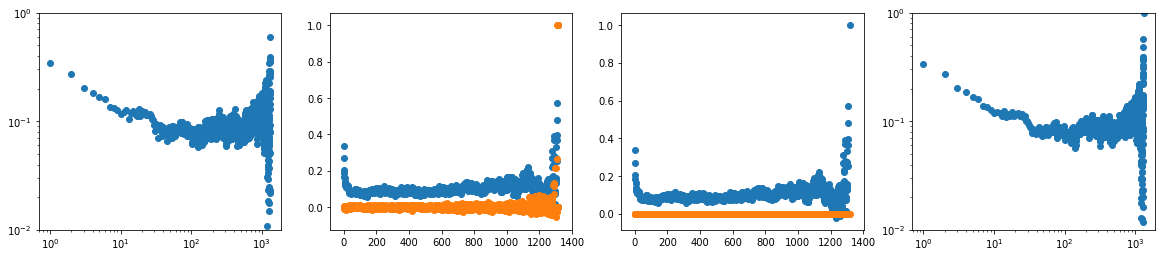

In [31]:
fig,axs = plt.subplots(ncols=4, figsize = (20,4))
ax = axs[0]
ax.scatter(np.arange(1, len(MI)+1), MI-shuff_MI)
ax.plot(np.arange(1, len(MI)+1), MI-shuff_MI, alpha = 0)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e-2,1])
ax = axs[1]
ax.scatter(np.arange(1, len(MI)+1), MI)
ax.scatter(np.arange(1, len(MI)+1), shuff_MI)

ax = axs[2]
ax.scatter(np.arange(1, len(MI)+1), MI)
ax.scatter(np.arange(1, len(MI)+1), MI_var)
ax = axs[3]
ax.scatter(np.arange(1, len(MI)+1), MI-MI_var)

ax.set_ylim([1e-2,1])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

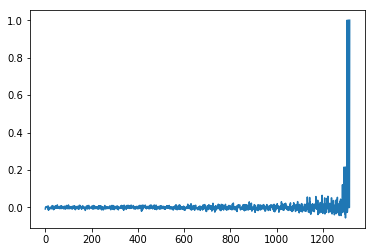

In [32]:
plt.plot(shuff_MI)

In [ ]:
mi_df[:3]

In [ ]:
len(mi_df)

In [ ]:
#mi_df.to_pickle(DATA_DIR / 'mi' / 'CHILDES_longest.pickle')